# Analysis of Gwent Police data 2010 - 2016
## Table of Contents

1. Introduction
2. Cleaning the data
3. Exploring the data
4. Building a model
5. Conclusion

## Introduction
The [UK Police](police.uk) have made [publically accessible data](https://data.police.uk) relating to crime in England, Wales and Northern Ireland in the form of street-level crime and outcome records for each month. The specific data I will be working with is all data collected on the Gwent Police force between 2010 and 2016 (2010 is the oldest data available openly), the reason for chosing Gwent is because it's my local county and it would be interesting to see the landscape of crime in my area!

The notebook will be divided into 3 main sections all of which revolve around using the data provided by the Police. The first section covers importing the data and cleaning it to be usable, thankfully the curators at the Police are good at their job and have left minimal cleaning for me to do.

The second section involves exploring the data with no *a priori* and answering a set of questions that will be outlined in the relevant section.

Finally I will take a look at seeing if a model can be built to classify a crime based on information given.

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

csv_file = pd.read_csv("./Data/merged.csv")

In [2]:
csv_file = csv_file.loc[pd.notnull(csv_file['Crime ID'])]

csv_file.drop("Context",1, inplace=True)
csv_file.drop_duplicates(subset="Crime ID", inplace=True)
csv_file.drop(csv_file.index[0], inplace=True)

In [3]:
csv_file.describe()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
count,149802,149802,149802,149802,146348,146348,149802,146345,146345,149802,144625
unique,149802,53,1,1,8431,8332,5924,811,811,15,22
top,85a67cbe3a43ada8a46f7e97133dcdc61cc2748d3ec9d0...,2015-07,Gwent Police,Gwent Police,-2.987372,51.581786,On or near Supermarket,W01001687,Newport 014D,Criminal damage and arson,Investigation complete; no suspect identified
freq,1,3560,149802,149802,513,513,5980,5035,5035,29513,73688


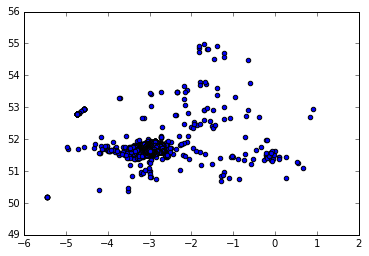

In [8]:
csv_file.Longitude = csv_file.Longitude.astype(float)
csv_file.Latitude = csv_file.Latitude.astype(float)

plt.scatter(csv_file.Longitude, csv_file.Latitude)

Not a great deal of clustering going on here with the long lat coordinates